In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Master thesis/dataset/mbti_1.csv')

In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
df['type'].values

array(['INFJ', 'ENTP', 'INTP', ..., 'INTP', 'INFP', 'INFP'], dtype=object)

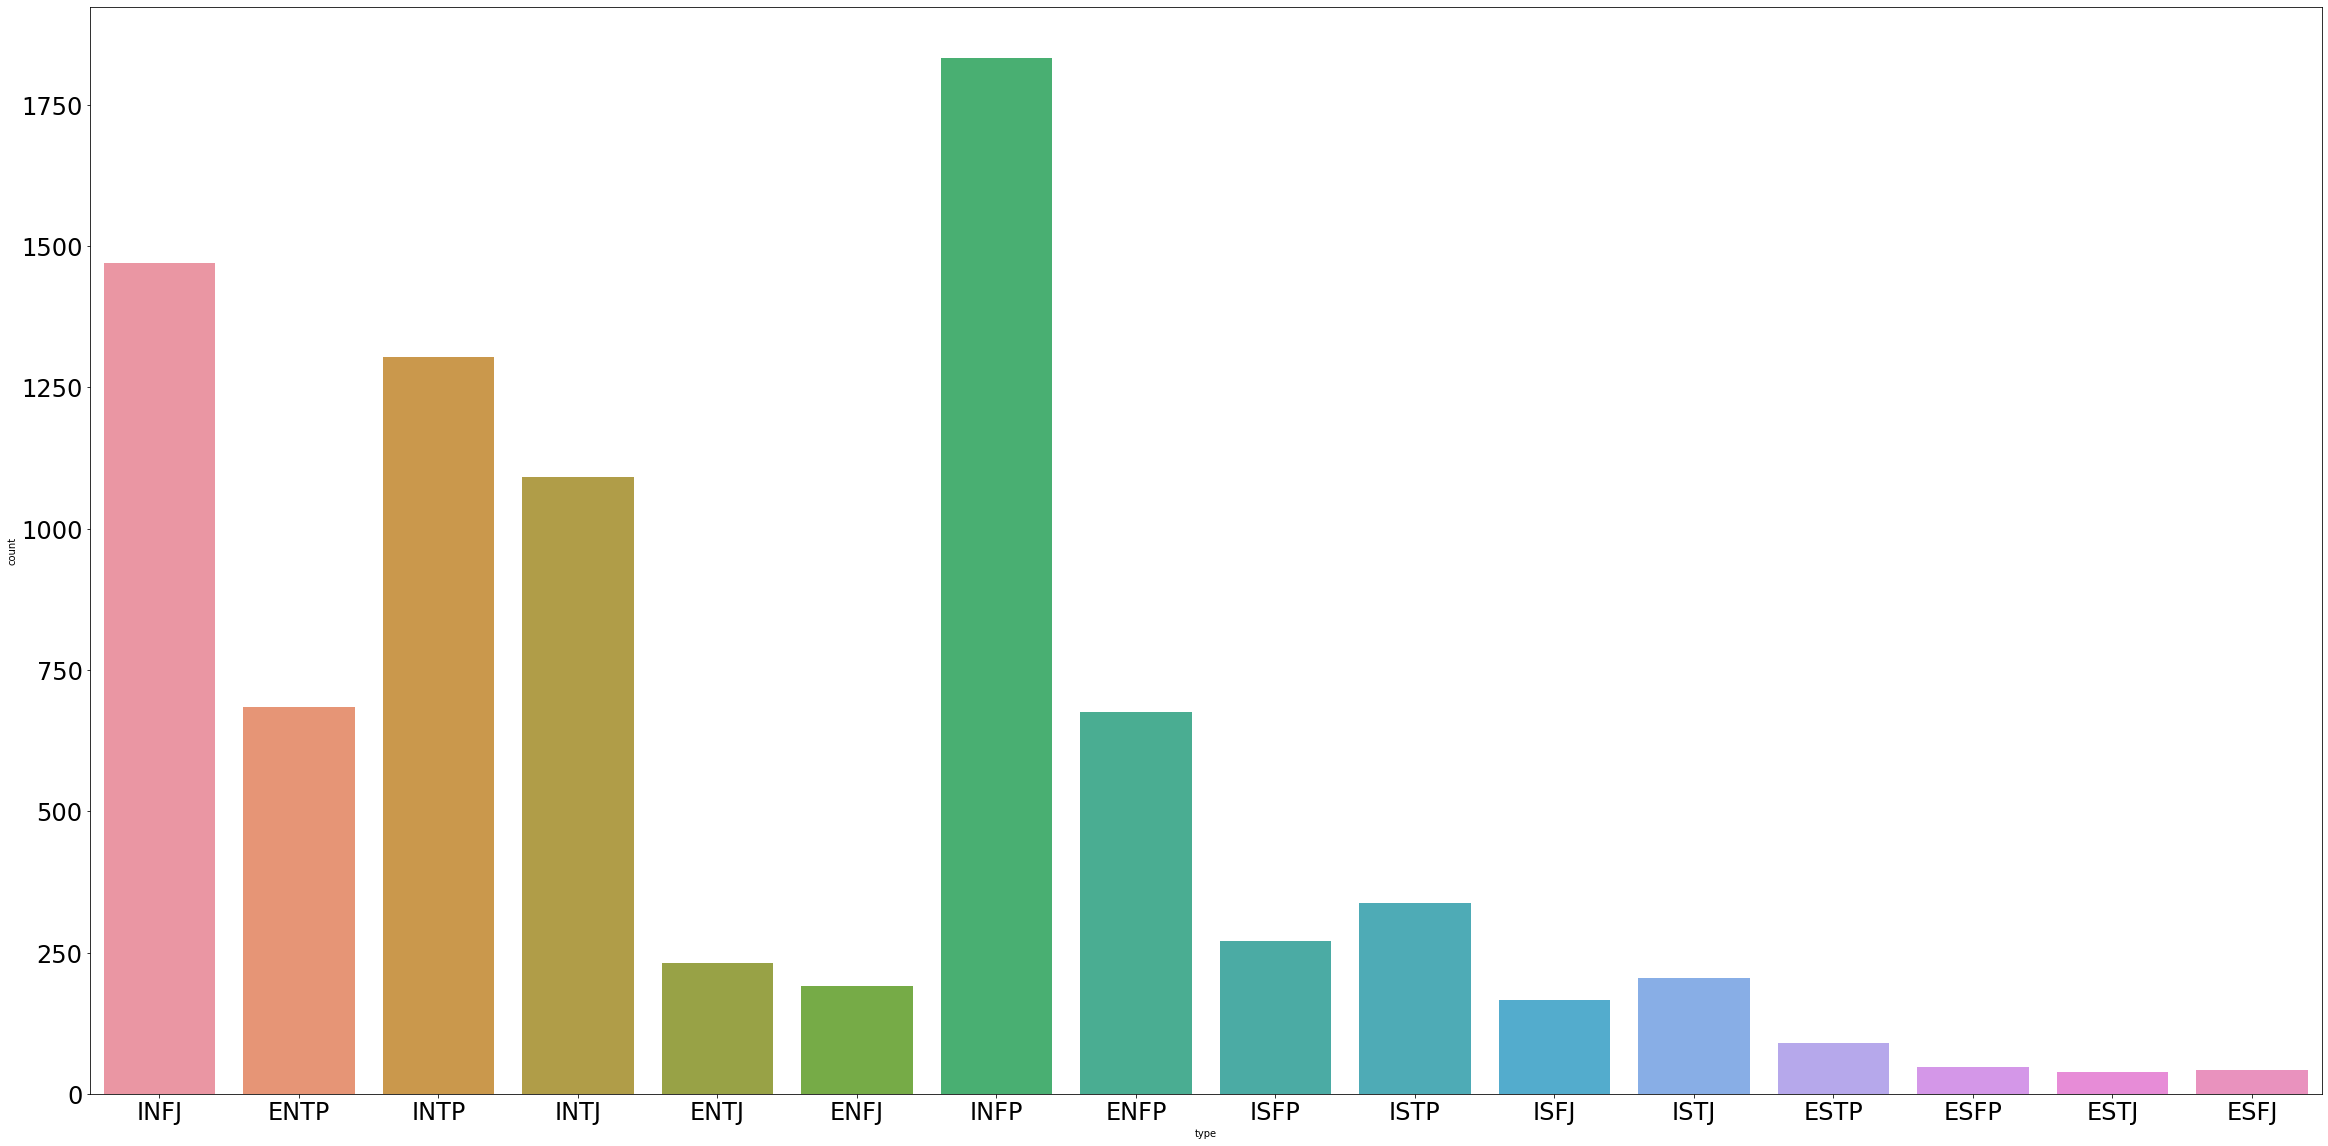

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=df, x='type')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

sw = set(stopwords.words('english'))
ps = PorterStemmer()

In [ ]:
def clean_text(sample):
  sample = sample.lower()

  sample = re.sub("[^a-zA-Z]+", " ", sample)

  sample = sample.split(" ")
  sample = [re.sub("http.*","",s) for s in sample if s not in sw]
  sample = [ps.stem(s) for s in sample]
  sample = " ".join(sample)
  return sample

In [ ]:
df['cleaned_posts'] = df['posts'].apply(clean_text)

In [ ]:
df.head()

,type,posts,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,www youtub com watch v qsxhcwe krw media tu...
1,ENTP,'I'm finding the lack of me in these posts ver...,find lack post alarm sex bore posit often exa...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one www youtub com watch v fhigbolffgw ...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoy convers day esoter gab natur ...
4,ENTJ,'You're fired.|||That's another silly misconce...,fire anoth silli misconcept approach logic go...


In [ ]:
x = df['cleaned_posts']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv = CountVectorizer( max_features=10000, ngram_range=(1,2))
cv.fit(x)
x=cv.transform(x)

tfidf = TfidfTransformer()
x = tfidf.fit_transform(x)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
y = df['type'].values
y = le.fit_transform(y)

In [ ]:
y[:100]

array([ 8,  3, 11, 10,  2, 10,  8, 10,  8, 11,  8,  0,  8, 10, 11, 11,  8,
        9,  8,  9, 11,  8,  2,  9,  2,  9,  1, 13,  9,  8,  9,  8, 11,  8,
        0,  8, 10,  9,  1,  2, 15,  8, 11,  9, 10, 11,  2,  9, 12, 10, 11,
        9, 12, 11,  9,  9,  9,  0, 11, 10,  8, 11,  9,  9,  3, 11, 13,  0,
        8,  0,  8,  9,  1, 15,  8, 11, 10, 10, 10,  9,  9,  8,  3,  2,  9,
       11,  9, 12, 14, 11,  3, 11, 13,  0,  8,  9,  8, 10,  8,  1])

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,shuffle=True,test_size=0.3)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(6072, 10000) (6072,) (2603, 10000) (2603,)


In [ ]:
np.unique(ytrain)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

cv = CountVectorizer( max_features=10000, ngram_range=(1,2))
cv.fit(xtrain)
x_train=cv.transform(xtrain)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(xtrain,ytrain)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

pred=lr.predict(xtest)
print(accuracy_score(ytest,pred))

0.6208221283134845


In [ ]:
print(confusion_matrix(ytest,pred))

[[ 23   6   0   1   0   0   0   0  10  11   5   1   0   2   2   1]
 [  1 128   1   7   0   1   0   0  12  21  15   7   2   5   1   2]
 [  1   3  25   5   0   0   0   0   2   7   6   9   1   1   0   2]
 [  1   5   3 103   1   1   0   0  20  14  12  30   0   1   2   4]
 [  0   0   0   1   5   0   0   0   1   1   1   1   1   2   0   0]
 [  0   1   0   1   0   1   0   0   3   2   2   3   0   3   0   0]
 [  0   1   1   1   0   0   4   0   3   2   1   1   0   0   2   0]
 [  0   1   0   5   0   0   0  11   1   2   2   1   0   1   1   3]
 [  5  18   1   7   0   0   0   1 281  65  32  25   3   2   1   1]
 [  7  15   1  11   1   0   0   0  29 419  19  26   2   5   1   3]
 [  2  11   5  13   0   0   0   0  20  15 213  37   0   1   3   3]
 [  3   6   4  21   1   0   0   2  25  33  32 264   0   2   3   6]
 [  0   2   0   0   0   0   0   0   7   5   1   8  26   3   1   0]
 [  0   3   0   4   1   0   0   0  12  17   3   5   1  33   1   1]
 [  0   1   0   4   0   0   0   0   3   9   7   5   1   4  21 

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
ypred = rf.predict(xtest)
print(accuracy_score(ytest,ypred))

0.545908567038033


#Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(xtrain,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = nb.predict(xtest)
print(accuracy_score(ytest,y_pred))

0.5455243949289281


#SVM

In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
Y_pred = svc.predict(xtest)
print(accuracy_score(ytest, Y_pred))

0.5835574337303112


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
knn_pred = knn.predict(xtest)
print(accuracy_score(ytest, knn_pred))

0.39531310026892047


#XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_pred = xgb.predict(xtest)
print(accuracy_score(ytest, xgb_pred))

0.6957356895889358


In [ ]:
xgb1 = XGBClassifier(max_depth=5)
xgb1.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb1_pred = xgb1.predict(xtest)
print(accuracy_score(ytest, xgb1_pred))

0.6884364195159431


In [ ]:
import tweepy as tw

In [ ]:
#API keys from developer.twitter.com
consumer_key='7NCzIYyE6v4rXHFgBfMjy6GqD'
consumer_secret ='mkD5V5WdViePkoiNdt5R4W0o8PJ8tojHXUxGgMzHhctp0rbRI6'
access_token='1144102706333618176-wIUa115mxUw7n1IHmpFEW5RTSs81li'
access_token_secret ='ccwvQxyexrKQTpdzRJyxgF6nJratx2qvKzTbWrrMwgPYn'


In [ ]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
handle = 'TiffanyHaddish'

In [ ]:
res = api.user_timeline(screen_name=handle, count=100, include_rts=True)

In [ ]:
tweets = [tweet.text for tweet in res]

In [ ]:
tweets

In [ ]:
text = ''.join(str(tweet) for tweet in tweets)

In [ ]:
text

In [ ]:
from sklearn.externals import joblib

joblib.dump(model, "mymodel.pkl")

In [ ]:
m = joblib.load("mymodel.pkl")